# Machine Learning Assignment
## Name : BOORLA RAJU
## ID : B200276
## Roll No : 11
## Class : CSE-C3

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [3]:
#Load dataset
df = pd.read_csv("titanic.csv")

In [4]:
# Drop unhelpful columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
# Fill missing values using different strategies
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [7]:
# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [8]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# 1. Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
mlr_pred = mlr_model.predict(X_test)

mlr_pred_class = np.round(mlr_pred).astype(int)
mlr_acc = accuracy_score(y_test, mlr_pred_class)

print("\nMultiple Linear Regression Classification Report:")
print(classification_report(y_test, mlr_pred_class))


Multiple Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [16]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



[Text(0.5, 0.875, 'x[1] <= -0.309\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Survived'),
 Text(0.25, 0.625, 'x[0] <= 0.229\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Pclass'),
 Text(0.125, 0.375, 'x[2] <= -2.093\ngini = 0.074\nsamples = 130\nvalue = [5, 125]\nclass = Pclass'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Survived'),
 Text(0.1875, 0.125, 'gini = 0.061\nsamples = 128\nvalue = [4, 124]\nclass = Pclass'),
 Text(0.375, 0.375, 'x[5] <= -0.178\ngini = 0.5\nsamples = 115\nvalue = [59, 56]\nclass = Survived'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 94\nvalue = [39, 55]\nclass = Pclass'),
 Text(0.4375, 0.125, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = Survived'),
 Text(0.75, 0.625, 'x[2] <= -1.785\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Survived'),
 Text(0.625, 0.375, 'x[3] <= 1.794\ngini = 0.434\nsamples = 22\nvalue = [7, 15]\nclass = Pclass'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 1

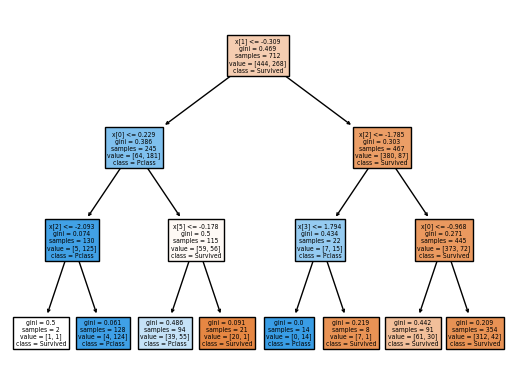

In [19]:
from sklearn.tree import plot_tree
plot_tree(dt_model,class_names=df.columns,filled=True)

In [12]:
# 3. K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_pred))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [13]:
# 4. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [14]:
# 5. Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [15]:
# 6. Clustering (unsupervised)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

from sklearn.metrics import adjusted_rand_score
clustering_score = adjusted_rand_score(y, cluster_labels)

print(f"\nKMeans Clustering (Adjusted Rand Index): {clustering_score:.4f}")

# Print model accuracy scores
print("\nModel Accuracy Scores:")
print(f"Multiple Linear Regression (rounded): {mlr_acc:.4f}")
print(f"Decision Tree: {dt_acc:.4f}")
print(f"K-Nearest Neighbors: {knn_acc:.4f}")
print(f"Naive Bayes: {nb_acc:.4f}")
print(f"Support Vector Machine: {svm_acc:.4f}")


KMeans Clustering (Adjusted Rand Index): 0.1118

Model Accuracy Scores:
Multiple Linear Regression (rounded): 0.7933
Decision Tree: 0.8045
K-Nearest Neighbors: 0.7989
Naive Bayes: 0.7765
Support Vector Machine: 0.8156
